## Titanic Dataset Analysis

In [6]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
## read data
## data prepocessing
## check null      ---> replace / drop
## check duplicate ---> drop duplicates
## check outlier
## EDA 3_5 question

### read data

In [8]:
df =pd.read_csv("/content/train.csv")

In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.describe(include='O')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### check null

In [12]:
print (df.isnull().sum())
print ((df.isnull().mean())*100)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [13]:
## categoriacal fill with --->mode  \ mode for each supcategore
## numerical fill with ---> mean \ median effect on data distrupution

###  check duplicate

In [14]:
df.duplicated().sum()

0

In [147]:
df.drop('Cabin',axis=1,inplace=True)

In [148]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### check Outlier

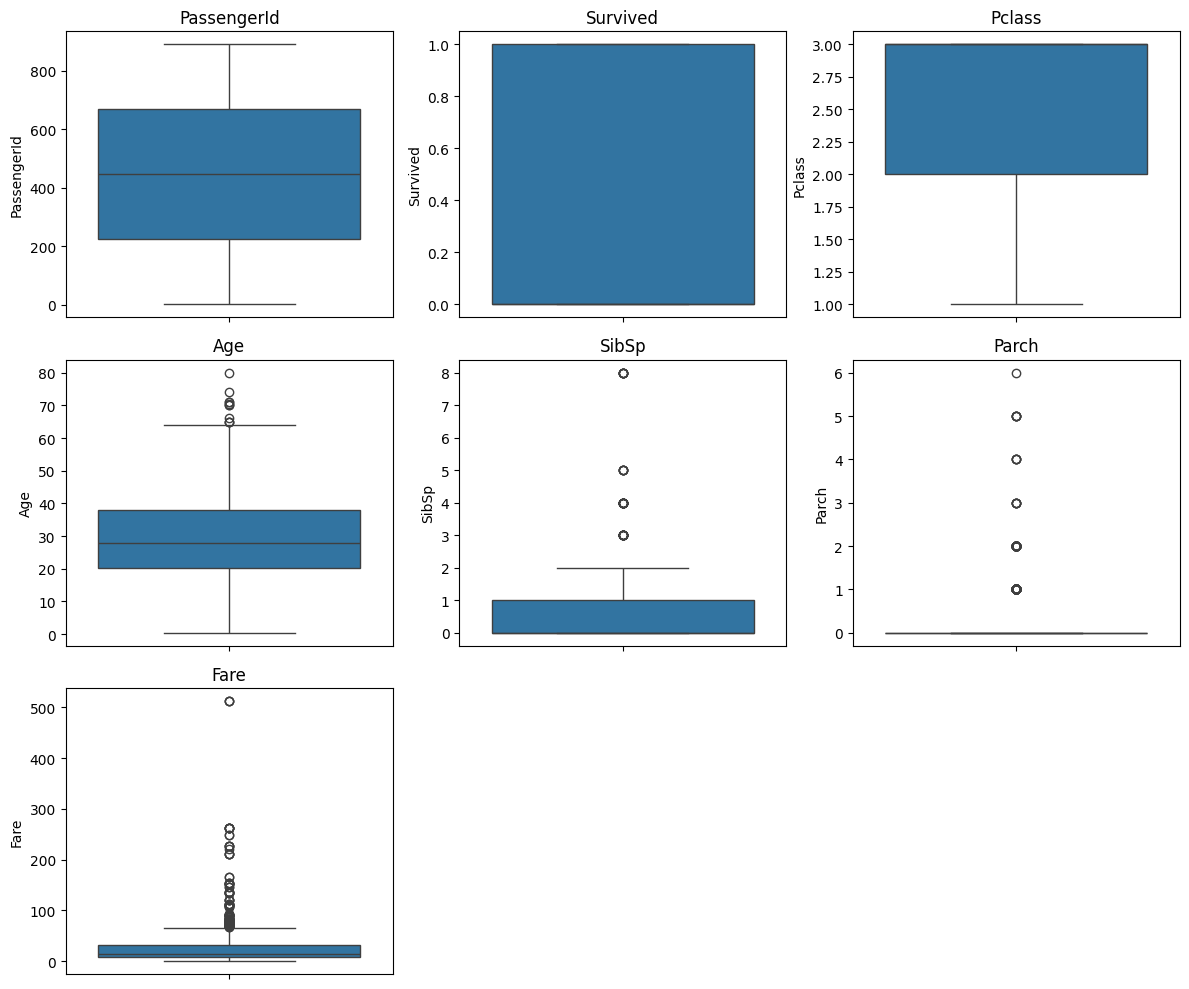

In [16]:
## useing visulization
columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(12, 10))  # Adjust figure size if needed

for i, column in enumerate(columns):
    plt.subplot(3, 3, i + 1)  # Create subplots (3 rows, 3 columns)
    sns.boxplot(data=df, y=column)  # Create boxplot for current column
    plt.title(column)  # Set title for each subplot

plt.tight_layout()  # Adjust subplot spacing
plt.show()  # Display the plot

In [17]:
##  numerical method
columns = [ 'Fare']
for i, column in enumerate(columns):
  Q1 = df[column].quantile(0.25)  # Remove the trailing space from 'Fare '
  Q3 = df[column].quantile(0.75)  # Remove the trailing space from 'Fare '
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outerlierss = df[(df[column] <= lower_bound) & (df[column] >= upper_bound)]  # Remove the trailing space from 'Fare '
  len(outerlierss)
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # Remove the trailing space from 'Fare '
  print(f"{column}\n lower_bound: {lower_bound}\n upper_bound: {upper_bound}")


### data

In [18]:
## check column data type
##what float col can be changed to int
##Make that column type is correct

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
## astype

In [25]:
#apply function
def categore(age) :
  if age<= 5 :
    return 'child'
  elif age<= 15 :
    return 'teen'
  elif age<= 25 :
    return 'young'
  elif age<= 40 :
    return 'middle'
  elif age>40 :
    return 'old'
df['age_group']=df['Age'].apply(categore)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,middle


In [33]:
def changetoed (Fare):
  return Fare*50

df['Fare_in_ed']=df['Fare'].apply(changetoed)

df['Fare_in_ed'] = df['Fare'].map(lambda Fare: Fare * 10)

In [34]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,Fare_in_ed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young,72.500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle,712.833


In [150]:
df.value_counts('Survived')

,count
Survived,
0,549
1,342


In [151]:
columns = [ 'Age']
plt.figure(figsize=(12, 10))  # Adjust figure size if needed

for i, column in enumerate(columns):
  Q1 = df[column].quantile(0.25)  # Remove the trailing space from 'Fare '
  Q3 = df[column].quantile(0.75)  # Remove the trailing space from 'Fare '
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outerlierss = df[(df[column] <= lower_bound) & (df[column] >= upper_bound)]  # Remove the trailing space from 'Fare '
  len(outerlierss)
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # Remove the trailing space from 'Fare '
  print(f"{column}\n lower_bound: {lower_bound}\n upper_bound: {upper_bound}")


Age
 lower_bound: -6.6875
 upper_bound: 64.8125


<Figure size 1200x1000 with 0 Axes>

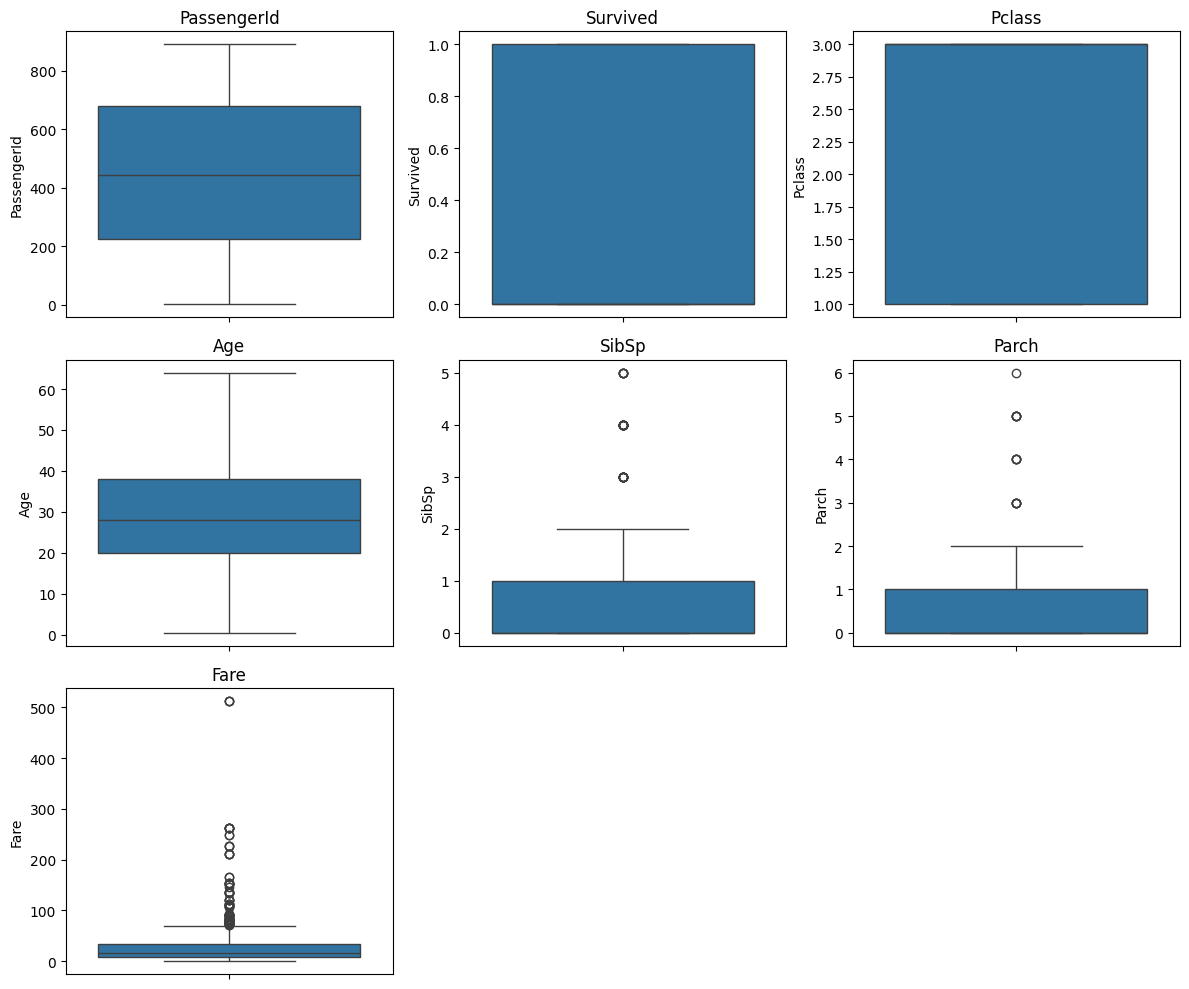

In [152]:
columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(12, 10))  # Adjust figure size if needed

for i, column in enumerate(columns):
    plt.subplot(3, 3, i + 1)  # Create subplots (3 rows, 3 columns)
    sns.boxplot(data=df, y=column)  # Create boxplot for current column
    plt.title(column)  # Set title for each subplot

plt.tight_layout()  # Adjust subplot spacing
plt.show()  # Display the plot

In [153]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,449.290185,0.411095,2.244666,29.072077,0.519203,0.435277,34.785093
std,258.604497,0.492383,0.835397,13.728478,0.934836,0.858015,53.255433
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.741700
75%,678.500000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,64.000000,5.000000,6.000000,512.329200


In [156]:
numdata=df.select_dtypes(include='number')

<Axes: >

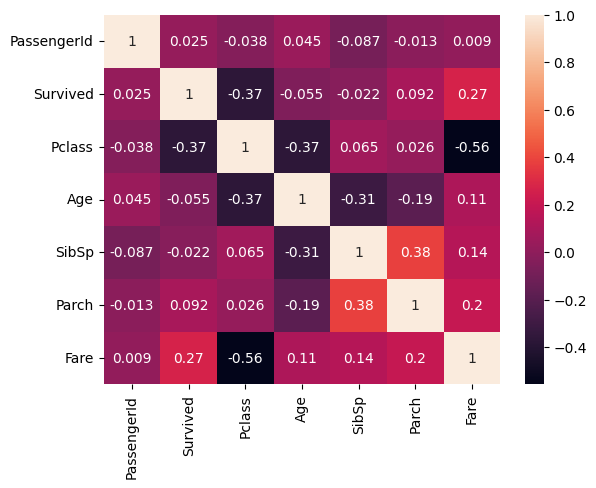

In [159]:
sns.heatmap(numdata.corr(),annot=True)

In [155]:
df.info

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  703 non-null    int64  
 1   Survived     703 non-null    int64  
 2   Pclass       703 non-null    int64  
 3   Name         703 non-null    object 
 4   Sex          703 non-null    object 
 5   Age          703 non-null    float64
 6   SibSp        703 non-null    int64  
 7   Parch        703 non-null    int64  
 8   Ticket       703 non-null    object 
 9   Fare         703 non-null    float64
 10  Embarked     701 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 65.9+ KB
